# Build a TB model for hBN

In [1]:
from pythtb import tb_model
import numpy as np
import matplotlib.pyplot as plt

# Define lattice vectors for a 2D hexagonal lattice
lat = [[1.0, 0.0,0.0], [0.5, np.sqrt(3)/2,0.0],[0.0,0.0,10.0]]  # a1 and a2 vectors

# Define orbital positions (Boron at (0,0) and Nitrogen at (1/3, 1/3))
orb = [[0.0, 0.0, 0.0], [1/3, 1/3, 0.0]]  # Orbital positions within the unit cell

# Create the tight-binding model for 3D system (2D hexagonal lattice in 3D space)
model = tb_model(3, 3, lat, orb)
delta = 0.0
# Set on-site energies for the two orbitals (Boron and Nitrogen)
model.set_onsite([-delta, delta])  # ε_B = -1.0, ε_N = 1.0

# Set the hopping parameter between Boron and Nitrogen
t_BN = 1.0  # Hopping parameter between B and N

# Set the hopping terms
model.set_hop(t_BN, 0, 1, [0, 0, 0])  # Intra-cell B-N hopping
model.set_hop(t_BN, 0, 1, [1, 0, 0])  # B-N hopping in the +a1 direction
model.set_hop(t_BN, 0, 1, [0, 1, 0])  # B-N hopping in the +a2 direction
model.set_hop(t_BN, 0, 1, [-1, 1, 0]) # B-N hopping in the -a1 + a2 direction


---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,    10.0 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ,     0.0 ]
 #  1  ===>  [  0.6667 ,  0.6667 ,     0.0 ]
site energies:
 #  0  ===>      -2.0
 #  1  ===>       4.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>      2.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ,  0 ] >     ===>      2.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ,  0 ] >     ===>      2.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  

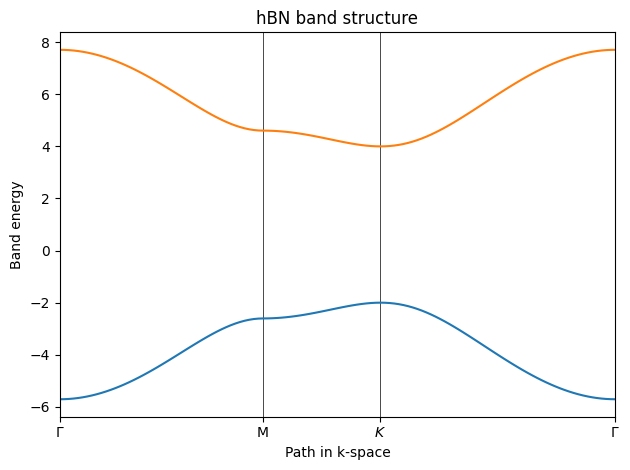

In [55]:
#!/usr/bin/env python

# Toy graphene model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0,0.0],[0.5,np.sqrt(3.0)/2.0,0.0],[0.0,0.0,10.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3., 0.0],[2./3.,2./3., 0.0]]

# make two dimensional tight-binding graphene model
my_model=tb_model(3,3,lat,orb)

# set model parameters
delta=2.0
t=2.0

# set on-site energies
my_model.set_onsite([-delta,2*delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0, 0])
my_model.set_hop(t, 1, 0, [ 0, 1, 0])

# print tight-binding model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.,0.0],[.5,.5,0.0],[2/3,1/3,0.0],[0.,0.,0.0]]
# labels of the nodes
label=(r'$\Gamma $',r'M', r'$K$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
(q_vec,q_dist,q_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_model: the pythtb model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("hBN band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])
# ax.plot(k_dist, evals[1]-evals[0], c='red')
# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     0.0 ,     0.5 ,     0.5 ]
 #  1  ===>  [     0.5 ,     0.0 ,     0.5 ]
 #  2  ===>  [     0.5 ,     0.5 ,     0.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,     0.5 ,     0.5 ]
site energies:
 #  0  ===>      -6.0
 #  1  ===>       2.0
hoppings:
<  0 | H |  0 + [  1 ,  0 ,  0 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  0 + [  0 ,  1 ,  0 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  0 + [  0 ,  0 ,  1 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>      1.0 +     0.0 i
<  0 | H |  1 + [  1 ,  0 ,  0 ] >     ===>      1.0 +     0.0 i
<  0 | H |  1 + [  0 ,  1 ,  0 

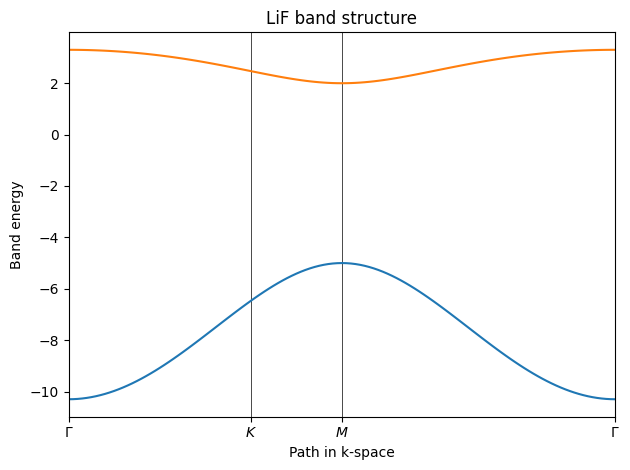

In [33]:
#!/usr/bin/env python

# Toy graphene my_model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB my_model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat = [[0.0, 0.5, 0.5],
       [0.5, 0.0, 0.5],
       [0.5, 0.5, 0.0]]
# define coordinates of orbitals
orb = [[0.0, 0.0, 0.0],  # Fluorine site
       [0.5, 0.5, 0.5]]  # Lithium site

# make two dimensional tight-binding graphene my_model
my_model=tb_model(3,3,lat,orb)

# set my_model parameters
E_F_2p = -6.0  # Example energy for F 2p orbital (in eV)
E_Li_2s = 2.0  # Example energy for Li 2s orbital (in eV)

t_FF=-0.5
t_LiF=1.0

# Set the on-site energies
my_model.set_onsite([E_F_2p, E_Li_2s])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
# Add hopping between Fluorine p-orbitals (nearest neighbors in FCC)
my_model.set_hop(t_FF, 0, 0, [1, 0, 0])
my_model.set_hop(t_FF, 0, 0, [0, 1, 0])
my_model.set_hop(t_FF, 0, 0, [0, 0, 1])

# Add hopping between Lithium and Fluorine
my_model.set_hop(t_LiF, 0, 1, [0, 0, 0])  # between Li and F
my_model.set_hop(t_LiF, 0, 1, [1, 0, 0])
my_model.set_hop(t_LiF, 0, 1, [0, 1, 0])
my_model.set_hop(t_LiF, 0, 1, [0, 0, 1])

# print tight-binding my_model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.,0.],[1./3.,1./3,0.],[0.5,0.5,0.],[0.,0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
(q_vec,q_dist,q_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_my_model: the pythtb my_model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# set vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("LiF band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])


# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

In [56]:
class tmp_lat():
    def __init__(self,lat):
        self.lat = np.array(lat)
        self.lat_vol = np.abs(np.dot(self.lat[2],np.cross(self.lat[0],self.lat[1])))
        self.rec_lat = self._rec_lat()
        self.rlat_vol = np.abs(np.dot(self.rec_lat[2],np.cross(self.rec_lat[0],self.rec_lat[1])))
    
    def _rec_lat(self):
        b1 = 2 * np.pi * np.cross(self.lat[1], self.lat[2]) / self.lat_vol
        b2 = 2 * np.pi * np.cross(self.lat[2], self.lat[0]) / self.lat_vol
        b3 = 2 * np.pi * np.cross(self.lat[0], self.lat[1]) / self.lat_vol

        # Combine the reciprocal lattice vectors into a matrix
        B = np.array([b1, b2, b3])        
        return B

In [57]:
c_lat = tmp_lat(lat)

In [58]:
from yambopy import *
nnkp_kgrid = mp_grid(nx = 10 , ny = 10 , nz = 1, latdb=c_lat)
nnkp_qgrid = mp_grid (nx = 5 , ny = 5, nz = 1, latdb=c_lat )

In [59]:
import numpy as np

def _generate_k_grid(nx,ny,nz, shift):
    # Generate indices for the k-point grid
    n1 = np.arange(nx)
    n2 = np.arange(ny)
    n3 = np.arange(nz)
    
    # Create meshgrid for all combinations of n1, n2, n3
    n1, n2, n3 = np.meshgrid(n1, n2, n3, indexing='ij')
    
    # Compute the k-points in reduced coordinates
    kx = n1.ravel() / nx + shift[0]
    ky = n2.ravel() / ny + shift[1]
    kz = n3.ravel() / nz + shift[2]
    
    # Combine the kx, ky, kz into a single array
    k_grid = np.vstack((kx, ky, kz)).T
    
    return k_grid


In [60]:
nnkp_kgrid.car_kpoints

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.72551975,  0.        ],
       [ 0.        ,  1.45103949,  0.        ],
       [ 0.        ,  2.17655924,  0.        ],
       [ 0.        ,  2.90207898,  0.        ],
       [ 0.        ,  3.62759873,  0.        ],
       [ 0.        ,  4.35311847,  0.        ],
       [ 0.        ,  5.07863822,  0.        ],
       [ 0.        ,  5.80415797,  0.        ],
       [ 0.        ,  6.52967771,  0.        ],
       [ 0.62831853, -0.36275987,  0.        ],
       [ 0.62831853,  0.36275987,  0.        ],
       [ 0.62831853,  1.08827962,  0.        ],
       [ 0.62831853,  1.81379936,  0.        ],
       [ 0.62831853,  2.53931911,  0.        ],
       [ 0.62831853,  3.26483886,  0.        ],
       [ 0.62831853,  3.9903586 ,  0.        ],
       [ 0.62831853,  4.71587835,  0.        ],
       [ 0.62831853,  5.44139809,  0.        ],
       [ 0.62831853,  6.16691784,  0.        ],
       [ 1.25663706, -0.72551975,  0.   

In [61]:
qlist = k_list(q_vec, c_lat)

In [62]:
# we need a temporary model class to call H2P without initializing wann_model
class mytb_model():
    def __init__(self, pythtb_model, nc, nv, nnkp_kgrid, eigv, eigvec):
        self.nk = nnkp_kgrid.k.shape[0]
        self.mpgrid = nnkp_kgrid
        self.nb = eigv.shape[1]
        self.nc = nc 
        self.nv = nv
        self.eigv = eigv
        self.eigvec = eigvec
        self._get_T_table()
        self.pythtb_model = pythtb_model

    def _get_T_table(self):
        ntransitions = self.nk*self.nc*self.nv
        T_table = np.zeros((ntransitions, 3),dtype=int)
        t_index = 0
        for ik in range(0,self.nk):
            for iv in range(0,self.nv):
                for ic in range(0,self.nc):
                        T_table[t_index] = [ik, iv, self.nv+ic]
                        t_index += 1
        self.ntransitions = ntransitions
        self.T_table = T_table

In [63]:
# get eigenvalues and eigenvectors from pythtb
eigv, eigvec = my_model.solve_all(nnkp_kgrid.k, eig_vectors=True)

In [64]:
# swap axes to match conventions from our yambopy-wannier library
eigv = my_model.solve_all(nnkp_kgrid.k).swapaxes(0,1)
eigvec = eigvec.transpose(1, 2, 0)

In [65]:
# Initialize H2P with this model
model = mytb_model(pythtb_model = my_model, nc=1, nv=1, nnkp_kgrid = nnkp_kgrid, eigv = eigv, eigvec = eigvec)

In [69]:
cpot = CoulombPotentials(v0=3.00,ngrid=[10,10,1], lattice=c_lat, ediel=[1.0,10.0,1.0])

Warning! CoulombPotentials works with atomic units and return energy in eV 

                Check consistency of units in the methods, they have not been properly tested
              


In [76]:
c_lat.lat_vol

8.660254037844386

In [67]:
nnkp_kgrid.car_kpoints[10]

array([ 0.62831853, -0.36275987,  0.        ])

In [14]:
cpot.vcoul(nnkp_kgrid.car_kpoints[0], nnkp_kgrid.car_kpoints[1])

9303.384918875365

In [13]:
cpot.v2dk([0.0,0.0,0.0], [0.0,0.0,0.0])

5.53009583491626395

In [71]:
h2p_tmp.h2

array([[ 7.21110255+0.j,  0.        +0.j, -0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  6.99601829+0.j,  0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  6.39877112+0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       ...,
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         5.87129764+0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         0.        +0.j,  6.58911283+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  6.99601829+0.j]])

In [77]:
# we can call this only with 
h2p_tmp = H2P(model, qmpgrid = nnkp_qgrid, method = 'model', cpot = cpot,bse_bands=True, qlist=qlist,ktype='model')


 Building H2P from model Coulomb potentials. Default is v2dt2

computing bse bands 


In [42]:
h2p_tmp.solve_H2P()

Setting number of qpoints equal to number of q points in the list

Diagonalizing the H2P matrix with dimensions: 100 for q-point: 0


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 1


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 2


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 3


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 4


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 5


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 6


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 7


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 8


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 9


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 10


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 11


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 12


Diagonalizing the H2P matrix with dimensions: 100 for q-poi

Done.



/Users/Reho0001/opt/anaconda3/envs/tbmodels/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Reho0001/opt/anaconda3/envs/tbmodels/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


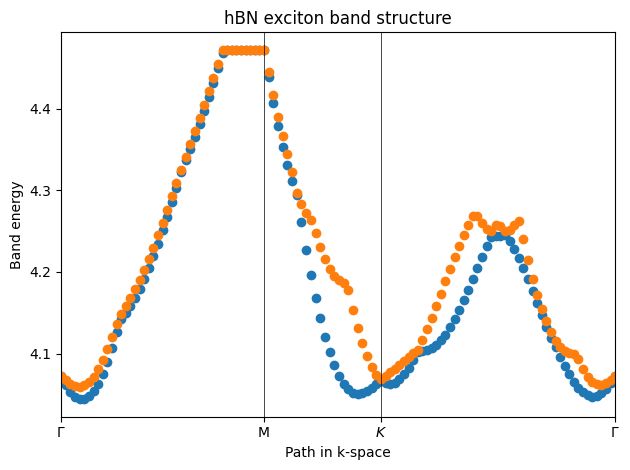

In [47]:
fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("hBN exciton band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
for it in range(0,2):#h2p_tmp.h2peigv.shape[1]):
    ax.scatter(q_dist,h2p_tmp.h2peigv[:,it])

# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

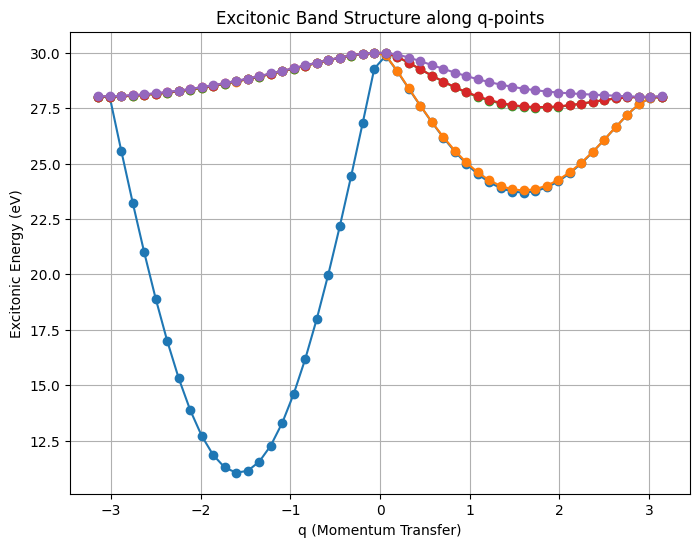

In [105]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Parameters
t_v = 1.0  # Bandwidth for valence band (eV)
t_c = 1.5  # Bandwidth for conduction band (eV)
V_direct = 10.0  # Direct Coulomb interaction (eV)
W_screened = -0.6  # Screened Coulomb interaction (eV)
k_points = np.linspace(-np.pi, np.pi, 100)  # Discrete k-points in 1D

# Define the dispersion relations
def epsilon_v(k):
    return 10.0 + t_v * np.cos(k)

def epsilon_c(k):
    return 40.5 + t_c * np.cos(k)

# Define the BSE kernel (simplified)
def BSE_kernel(k, k_prime, q):
    return V_direct * np.cos(k - k_prime) + W_screened * np.cos(k + q - k_prime)

# List of q-points along which we compute the band structure
q_points = np.linspace(-np.pi, np.pi, 50)

# Container for excitonic energies
excitonic_energies = np.zeros((len(q_points),len(k_points)))

# Loop over q-points to compute the excitonic energies
for iq,q_point in enumerate(q_points):
    # Construct the BSE Hamiltonian for the current q-point
    H_BSE_res = np.zeros((len(k_points), len(k_points)))

    for i, k in enumerate(k_points):
        for j, k_prime in enumerate(k_points):
            # Quasiparticle energy difference
            Delta_E_kq = epsilon_c(k + q_point) - epsilon_v(k)
            # BSE kernel
            K_kq = BSE_kernel(k, k_prime, q_point)
            # Fill the Hamiltonian matrix
            H_BSE_res[i, j] = Delta_E_kq * (i == j) + K_kq

    # Diagonalize the BSE Hamiltonian to find excitonic states
    E_exciton, psi_exciton = eigh(H_BSE_res)

    # Store the lowest excitonic energy for this q-point
    excitonic_energies[iq,:] = E_exciton[:]  # Save the lowest exciton energy

# Convert to numpy array for plotting
excitonic_energies = np.array(excitonic_energies)

# Plotting the band structure along q-points
plt.figure(figsize=(8, 6))
plt.plot(q_points, excitonic_energies[:,:5], 'o-')#, label='Excitonic Band')
plt.xlabel('q (Momentum Transfer)')
plt.ylabel('Excitonic Energy (eV)')
plt.title('Excitonic Band Structure along q-points')
plt.grid(True)
#plt.ylim([0,10])
#plt.legend()
plt.show()


In [52]:
h2p_tmp.qlist.k

array([[0.        , 0.        , 0.        ],
       [0.00833333, 0.00833333, 0.        ],
       [0.01666667, 0.01666667, 0.        ],
       [0.025     , 0.025     , 0.        ],
       [0.03333333, 0.03333333, 0.        ],
       [0.04166667, 0.04166667, 0.        ],
       [0.05      , 0.05      , 0.        ],
       [0.05833333, 0.05833333, 0.        ],
       [0.06666667, 0.06666667, 0.        ],
       [0.075     , 0.075     , 0.        ],
       [0.08333333, 0.08333333, 0.        ],
       [0.09166667, 0.09166667, 0.        ],
       [0.1       , 0.1       , 0.        ],
       [0.10833333, 0.10833333, 0.        ],
       [0.11666667, 0.11666667, 0.        ],
       [0.125     , 0.125     , 0.        ],
       [0.13333333, 0.13333333, 0.        ],
       [0.14166667, 0.14166667, 0.        ],
       [0.15      , 0.15      , 0.        ],
       [0.15833333, 0.15833333, 0.        ],
       [0.16666667, 0.16666667, 0.        ],
       [0.175     , 0.175     , 0.        ],
       [0.

In [46]:
evals[1]-evals[0]

array([7.21110255, 7.209582  , 7.20502258, 7.19743103, 7.1868186 ,
       7.17320104, 7.15659865, 7.13703628, 7.11454337, 7.089154  ,
       7.06090691, 7.02984559, 6.99601829, 6.9594781 , 6.92028303,
       6.87849609, 6.83418537, 6.78742413, 6.73829088, 6.68686956,
       6.63324958, 6.57752598, 6.51979956, 6.46017702, 6.39877112,
       6.33570081, 6.27109138, 6.20507465, 6.13778913, 6.06938014,
       6.        , 5.92980815, 5.85897129, 5.78766348, 5.71606621,
       5.64436846, 5.57276665, 5.50146461, 5.43067341, 5.36061116,
       5.29150262, 5.2235788 , 5.1570763 , 5.09223662, 5.02930515,
       4.96853011, 4.91016118, 4.85444792, 4.80163806, 4.75197547,
       4.70569799, 4.66303502, 4.62420509, 4.58941316, 4.55884807,
       4.53267987, 4.51105735, 4.49410576, 4.48192477, 4.47458685,
       4.47213595, 4.47458685, 4.48192477, 4.49410576, 4.51105735,
       4.53267987, 4.55884807, 4.58941316, 4.62420509, 4.66303502,
       4.70569799, 4.75197547, 4.80163806, 4.85444792, 4.91016

In [24]:
def monkhorst_pack_grid(n):
    """
    Genera una griglia di n punti uniforme tipo Monkhorst-Pack, centrata sull'origine e che include sempre l'origine.

    Args:
        n: Numero di punti lungo ciascun asse della griglia.

    Returns:
        Un array NumPy di forma (n, n, 3) contenente le coordinate dei punti della griglia.
    """

    # Calcola l'offset per centrare la sequenza sullo zero
    offset = 0.5 if n % 2 == 0 else 0.5 * (n - 1) / n 

    # Genera una sequenza di n valori equispaziati tra -0.5 e 0.5, centrata sullo zero
    linspace = np.linspace(-0.5 + offset, 0.5 - offset, n, endpoint=True)

    # Crea una griglia 2D utilizzando meshgrid
    x, y = np.meshgrid(linspace, linspace)

    # Combina le coordinate x e y con una terza coordinata z pari a zero
    grid = np.stack((x, y, np.zeros_like(x)), axis=-1)

    return grid

In [25]:
grid = monkhorst_pack_grid(4)

In [26]:
grid

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [51]:
h2p_tmp.h2peigv[5]

array([4.0446416 +0.j, 4.0446416 +0.j, 4.08261212+0.j, 4.08261212+0.j,
       4.13617957+0.j, 4.13617957+0.j, 4.14952401+0.j, 4.14952401+0.j,
       4.2128033 +0.j, 4.2128033 +0.j, 4.23902735+0.j, 4.23902735+0.j,
       4.3702625 +0.j, 4.3702625 +0.j, 4.38010722+0.j, 4.38010722+0.j,
       4.4060346 +0.j, 4.4060346 +0.j, 4.43129496+0.j, 4.43129496+0.j,
       4.47213595+0.j, 4.47213595+0.j, 4.47213595+0.j, 4.47213595+0.j,
       4.47213595+0.j, 4.47213595+0.j, 4.47213595+0.j, 4.47213595+0.j,
       4.47213595+0.j, 4.47213595+0.j, 4.50240791+0.j, 4.54198975+0.j,
       4.54198975+0.j, 4.56577645+0.j, 4.56577645+0.j, 4.58965937+0.j,
       4.58965937+0.j, 4.59859002+0.j, 4.59859002+0.j, 4.69552561+0.j,
       4.7346264 +0.j, 4.7346264 +0.j, 4.86154593+0.j, 4.86154593+0.j,
       4.90566599+0.j, 4.90566599+0.j, 4.92905494+0.j, 4.92905494+0.j,
       4.94693734+0.j, 4.99237733+0.j, 4.99237733+0.j, 5.0081596 +0.j,
       5.0081596 +0.j, 5.08280279+0.j, 5.08280279+0.j, 5.13690887+0.j,
      

ValueError: x and y must have same first dimension, but have shapes (121,) and (100,)

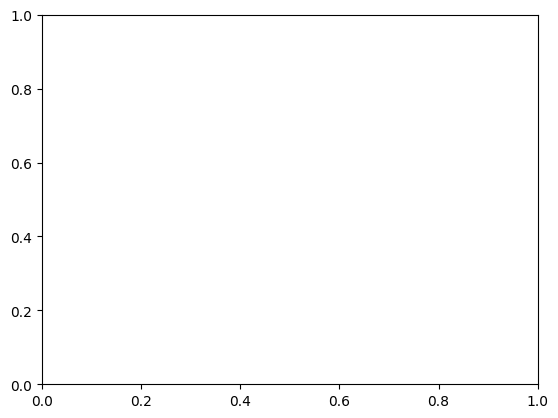

In [28]:
fig,ax = plt.subplots()

ax.plot(k_dist,h2p_tmp.h2peigv[0,:])

In [16]:
!pwd

/Users/Reho0001/workQE/Projects/mlxwf


# Visualize the grid and neighbours

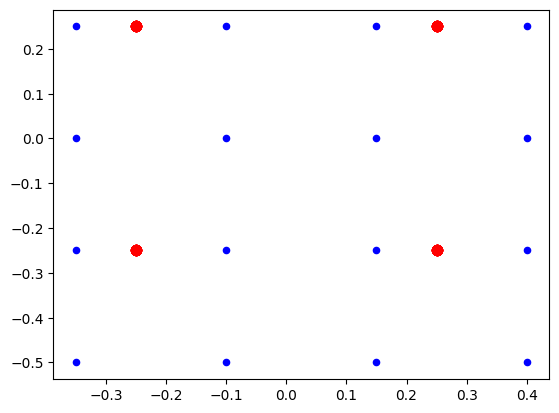

In [26]:
nnkp_kgrid = mp_grid(nx = 4 , ny = 4 , nz = 1, latdb=c_lat,shift=[0.4,0.0,0.0])
fig,ax = plt.subplots()
neigh = nnkp_kgrid.fold_into_bz(nnkp_kgrid.b_grid)
for ik,k in enumerate(nnkp_kgrid.k):
    ax.scatter(k[0], k[1], s = 20, c='blue')
    for j in range(0,8):
        ax.scatter(neigh[8*ik+j,0],neigh[8*ik+j,1], s=50,c = 'red')

In [28]:
nnkp_kgrid.k

array([[-0.1 , -0.5 , -0.5 ],
       [-0.1 , -0.25, -0.5 ],
       [-0.1 ,  0.  , -0.5 ],
       [-0.1 ,  0.25, -0.5 ],
       [ 0.15, -0.5 , -0.5 ],
       [ 0.15, -0.25, -0.5 ],
       [ 0.15,  0.  , -0.5 ],
       [ 0.15,  0.25, -0.5 ],
       [ 0.4 , -0.5 , -0.5 ],
       [ 0.4 , -0.25, -0.5 ],
       [ 0.4 ,  0.  , -0.5 ],
       [ 0.4 ,  0.25, -0.5 ],
       [-0.35, -0.5 , -0.5 ],
       [-0.35, -0.25, -0.5 ],
       [-0.35,  0.  , -0.5 ],
       [-0.35,  0.25, -0.5 ]])

# Build H2P and compute exciton band structure